<h1> Main.ipynb </h1>
<h2> 1. Import libraries and modules </h2>

In [1]:
import numpy as np
import pandas as pd

from src.Data_Retriever import DataRetriever as DatRet

from src.Optimization.Markowitz_PT import MarkowitzPT as MPT

from src.Optimization.Environment import PortfolioEnvironment as PorEnv
from src.Optimization.RLModelCompilation import RL_Model as RLM
# from src.Optimization.NeuralNet import CustomCNNExtractor 

from src.Result.Menchero_OGA import MencheroOGA as MOGA
from src.Result.IndPortResults import GenerateResult as GR
from src.Result.OverviewResults import ResultConveyor as RC

import time

<h2> 2. Define operating variables </h2>

In [2]:
trading_n = 400
history_usage = 504
n_sectors = 6
n_stocks_per_sector = 4

# For RL algorithm
history_usage_RL = 30
rolling_reward_window = 15

<h2> 3. Define stock dataframe </h2>

In [3]:
ticker_df =  pd.DataFrame()
ticker_df["Petroleum"] = ["EQNR.OL", "AKRBP.OL", "SUBC.OL", "BWO.OL",]
ticker_df["Seafood (food)"] = ["ORK.OL", "MOWI.OL", "SALM.OL", "LSG.OL"]
ticker_df["Materials"] = ["NHY.OL", "YAR.OL", "RECSI.OL", "BRG.OL"]  #del this
ticker_df["Technologies"] = ["TEL.OL", "NOD.OL", "ATEA.OL", "BOUV.OL"]
ticker_df["Financial"] = ["STB.OL", "DNB.OL", "GJF.OL", "AKER.OL"]
ticker_df["Shipping"] = ["WAWI.OL", "SNI.OL", "BELCO.OL", "ODF.OL"]
ticker_df

,Petroleum,Seafood (food),Materials,Technologies,Financial,Shipping
0,EQNR.OL,ORK.OL,NHY.OL,TEL.OL,STB.OL,WAWI.OL
1,AKRBP.OL,MOWI.OL,YAR.OL,NOD.OL,DNB.OL,SNI.OL
2,SUBC.OL,SALM.OL,RECSI.OL,ATEA.OL,GJF.OL,BELCO.OL
3,BWO.OL,LSG.OL,BRG.OL,BOUV.OL,AKER.OL,ODF.OL


<h2> 4. Define ESG array </h2>

In [4]:
esg_scores = np.array([36.6, 35.3, 17.9, 18, 
                18, 21.2, 18.7, 29.2, 
                15.7, 25.6, 25.6, 18.4, # Del this
                19.8, 13.8, 18.1, 19, 
                17.2, 14, 17.2, 19.5, 
                19.7, 21.2, 26.8, 19.3])

<h2> 5.-7. (Non-necessary for reproducability) </h2>
<h3>Data retrieval</h3>
<h3>Benchmark optimization (MPT)</h3>
<h3>RL optimization x4</h3>
<br>
All of the data has been generated an stored in csvs. Therefore, I can comment out the code lines below.

In [5]:
# # Retrieve data from yf API: y-m-d
# data = DatRet(ticker_df, "2013-01-01", "2024-12-31", history_usage_RL=history_usage_RL)
# # In function below, set log=True to check for data availability
# data.retrieve_data()

In [6]:
# Generate benchmark weights thorugh MPT using Sharpe ratio
# benchmark = MPT(history_usage, trading_n)
# # IMPORTANT: In order to see  the effect of the weights, algo exclude last observation from optimization
# benchmark.frequency_optimizing()

In [7]:
# objectives = ["Return", "Sharpe", "Sortino", "Sterling", "Return", "Sharpe", "Sortino", "Sterling"]
# esg_compliancy = [True, True, True, True, False, False, False, False]
# # objectives = ["Sharpe"]
# # esg_compliancy = [True]

# for i in range(len(objectives)):
#     reinforcement = RLM(esg_scores, 
#                         objective=objectives[i],
#                         history_usage=history_usage_RL,
#                         rolling_reward_window=rolling_reward_window,
#                         total_timesteps=200,
#                         esg_compliancy=esg_compliancy[i],
#                         )
#     reinforcement.train_model()
#     reinforcement.test_model()

<h2> 8. Attribution analysis </h2>

In [8]:
# paths = ["Return_esg_True", "Sharpe_esg_True",
#          "Sortino_esg_True","Sterling_esg_True",
#          "Return_esg_False", "Sharpe_esg_False",
#          "Sortino_esg_False","Sterling_esg_False",]

# analysis_list = []
# for i in range(len(paths)):
#     att_anal = GR(paths[i],
#             n_sectors, n_stocks_per_sector,
#             trading_n,
#             esg_scores, 
#             ticker_df.columns)
#     att_anal.friple_frequency_analysis()
#     analysis_list.append(att_anal)

<h2> 9. Overview  Result Analysis </h2>

In [9]:
# theta = RC(analysis_list, trading_n)
# theta.convey_results()

<h1> 10. Ad-hoc </h1>

In [10]:
ret = pd.read_csv("Data/Input/StockReturns.csv")
weights = pd.read_csv("Data/RL_weights_Return_esg_false.csv")

train_set = ret.iloc[:int(0.85*len(ret))]
test_set = ret.iloc[int(0.85*len(ret)):]

In [11]:
data = test_set.values

In [ ]:
current_step = 6
history_usage = 5

if current_step < history_usage:
    start_idx = max(0, current_step-  history_usage)
else:
    start_idx = max(0, current_step-  history_usage) +1

end_idx = current_step+1

In [17]:
mydf = pd.DataFrame(data[start_idx:end_idx, :])
mydf.shape

(5, 24)

In [ ]:
alfa = np.array([np.dot(test_set.iloc[i+1], weights.iloc[i]) for i in range(len(test_set)-1)])

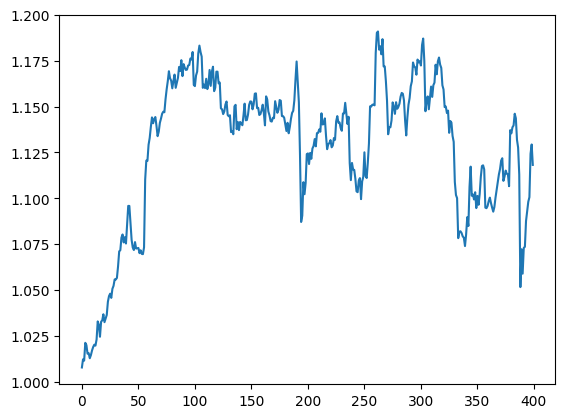

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.cumprod(alfa[-400:]+1))